In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


2023-08-10 11:43:04.656404: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 11:43:04.694970: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 11:43:04.695729: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 11:43:05.760790: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv('unlabelled.csv')

In [3]:
data

,Unnamed: 0,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
0,27,23,134446,9,1,0,0,54,0,0,...,0,1,0,0,0,0,0,0,0,0
1,48,52,201062,7,0,0,0,18,0,0,...,0,0,0,1,0,0,0,0,0,0
2,68,46,170338,9,1,0,0,40,0,0,...,0,0,0,0,0,0,0,0,1,0
3,73,21,388946,10,0,0,0,40,0,0,...,1,0,0,0,0,0,0,0,0,0
4,82,24,83141,10,1,0,1876,40,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30505,48824,45,119199,12,0,0,0,48,0,1,...,0,0,0,0,1,0,0,0,0,3
30506,48825,31,199655,14,0,0,0,30,0,0,...,0,0,1,0,0,0,0,0,0,3
30507,48827,37,198216,12,0,0,0,40,0,0,...,0,0,0,0,0,0,0,1,0,3
30508,48830,43,255835,10,0,0,0,40,0,0,...,0,0,0,0,0,0,0,0,0,3


In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
0,23,134446,9,1,0,0,54,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,52,201062,7,0,0,0,18,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,46,170338,9,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,21,388946,10,0,0,0,40,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,24,83141,10,1,0,1876,40,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30505,45,119199,12,0,0,0,48,0,1,0,...,0,0,0,0,1,0,0,0,0,3
30506,31,199655,14,0,0,0,30,0,0,1,...,0,0,1,0,0,0,0,0,0,3
30507,37,198216,12,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,3
30508,43,255835,10,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,3


# Encoder training

In [33]:
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and validation data
normalized_train_data = scaler.fit_transform(train_data)
normalized_val_data = scaler.transform(val_data)

# Now you can use normalized_train_data and normalized_val_data for training and validation


In [38]:
encoding_dim

32

In [37]:
import joblib

scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)


['scaler.pkl']

Epoch 1/200
763/763 [==============================] - 2s 1ms/step - loss: 0.8558 - val_loss: 0.7885
Epoch 2/200
763/763 [==============================] - 1s 1ms/step - loss: 0.8030 - val_loss: 0.7841
Epoch 3/200
763/763 [==============================] - 1s 1ms/step - loss: 0.7961 - val_loss: 0.7642
Epoch 4/200
763/763 [==============================] - 1s 1ms/step - loss: 0.7817 - val_loss: 0.7631
Epoch 5/200
763/763 [==============================] - 1s 1ms/step - loss: 0.7810 - val_loss: 0.7625
Epoch 6/200
763/763 [==============================] - 1s 1ms/step - loss: 0.7809 - val_loss: 0.7621
Epoch 7/200
763/763 [==============================] - 1s 1ms/step - loss: 0.7805 - val_loss: 0.7617
Epoch 8/200
763/763 [==============================] - 1s 1ms/step - loss: 0.7803 - val_loss: 0.7615
Epoch 9/200
763/763 [==============================] - 1s 1ms/step - loss: 0.7801 - val_loss: 0.7615
Epoch 10/200
763/763 [==============================] - 1s 1ms/step - loss: 0.7752 - val_lo

Epoch 161/200
763/763 [==============================] - 1s 1ms/step - loss: 0.6987 - val_loss: 0.6846
Epoch 162/200
763/763 [==============================] - 1s 1ms/step - loss: 0.6984 - val_loss: 0.6808
Epoch 163/200
763/763 [==============================] - 1s 1ms/step - loss: 0.6980 - val_loss: 0.6797
Epoch 164/200
763/763 [==============================] - 1s 1ms/step - loss: 0.6972 - val_loss: 0.6798
Epoch 165/200
763/763 [==============================] - 1s 1ms/step - loss: 0.6981 - val_loss: 0.6814
Epoch 166/200
763/763 [==============================] - 1s 1ms/step - loss: 0.6974 - val_loss: 0.6794
Epoch 167/200
763/763 [==============================] - 1s 1ms/step - loss: 0.6964 - val_loss: 0.6787
Epoch 168/200
763/763 [==============================] - 1s 1ms/step - loss: 0.6967 - val_loss: 0.6780
Epoch 169/200
763/763 [==============================] - 1s 1ms/step - loss: 0.6974 - val_loss: 0.6812
Epoch 170/200
763/763 [==============================] - 1s 1ms/step - lo

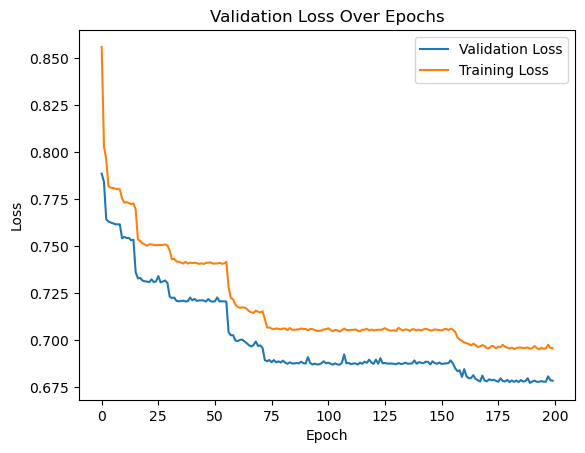

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_dim = normalized_train_data.shape[1]  # Number of features in your data
encoding_dim = 32  # Number of nodes in the bottleneck layer

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layers
encoder_layer1 = Dense(128, activation='relu')(input_layer)
encoder_layer2 = Dense(64, activation='relu')(encoder_layer1)
encoder_layer3 = Dense(encoding_dim, activation='relu')(encoder_layer2)

# Define the decoding layers with symmetric structure
decoder_layer1 = Dense(64, activation='relu')(encoder_layer3)
decoder_layer2 = Dense(128, activation='relu')(decoder_layer1)
decoder_layer3 = Dense(input_dim, activation='sigmoid')(decoder_layer2)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder_layer3)

# Compile the model
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the model with validation data and save training history
history = autoencoder.fit(normalized_train_data, normalized_train_data, epochs=200, batch_size=32, shuffle=True, validation_data=(normalized_val_data, normalized_val_data))

# Plot the validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Over Epochs')
plt.legend()
plt.show()


In [9]:
encoder = Model(inputs=input_layer, outputs=encoder_layer3)
decoder_input = Input(shape=(encoding_dim,))
decoder_layer1_decoded = autoencoder.layers[-3](decoder_input)
decoder_layer2_decoded = autoencoder.layers[-2](decoder_layer1_decoded)
decoder_layer3_decoded = autoencoder.layers[-1](decoder_layer2_decoded)
decoder = Model(inputs=decoder_input, outputs=decoder_layer3_decoded)


In [10]:
encoder

In [11]:
decoder

In [12]:
autoencoder.save('my_autoencoder_model.keras')
encoder.save('my_encoder_model.keras')
decoder.save('my_decoder_model.keras')

# Encoder augementation

In [27]:
import pandas as pd
from tensorflow.keras.models import load_model


labelled = pd.read_csv('labelled.csv')

labelled = labelled.drop(columns=['Unnamed: 0'])
labelled = labelled.drop(columns=['income'])

encoder = load_model('my_encoder_model.keras')


# Normalize the data using the same scaler you used for training
normalized_data = scaler.transform(labelled)  # Assuming 'scaler' is the scaler used for training

# Use the encoder to encode the normalized data
encoded_data = encoder.predict(normalized_data)

# Convert the encoded data to a DataFrame if needed
encoded_df = pd.DataFrame(encoded_data, columns=[f'encoded_{i}' for i in range(encoding_dim)])

# Now 'encoded_df' contains the encoded representation of your 'data'


460/460 [==============================] - 0s 619us/step


In [28]:
encoded_df

,encoded_0,encoded_1,encoded_2,encoded_3,encoded_4,encoded_5,encoded_6,encoded_7,encoded_8,encoded_9,...,encoded_22,encoded_23,encoded_24,encoded_25,encoded_26,encoded_27,encoded_28,encoded_29,encoded_30,encoded_31
0,70.828468,0.0,6.417907,45.229298,69.439423,37.968582,113.307869,0.000000,60.712833,39.263443,...,30.103571,0.0,15.536768,46.716366,0.000000,9.117380,49.708584,22.820082,0.0,0.0
1,22.302612,0.0,72.936905,21.129541,61.932487,29.264469,133.146667,0.000000,69.785103,21.524065,...,38.796341,0.0,10.734479,18.413361,0.000000,22.856050,37.405182,43.249992,0.0,0.0
2,61.390736,0.0,84.868141,66.560303,54.280510,21.039185,128.111557,0.000000,75.713730,58.460705,...,21.170408,0.0,8.786838,22.989090,0.000000,27.532419,47.879517,85.125549,0.0,0.0
3,60.709846,0.0,21.776863,22.212002,104.929413,80.677361,98.343307,0.000000,61.092232,22.077387,...,56.837727,0.0,6.264252,17.991486,0.000000,72.322128,36.475597,49.759247,0.0,0.0
4,86.232109,0.0,85.912102,64.196388,14.417522,22.692183,141.583145,0.000000,89.916527,66.808418,...,79.706802,0.0,0.000000,52.771770,0.000000,26.510931,69.719337,85.606804,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14707,22.729502,0.0,6.237172,34.471146,84.087395,66.401703,117.769028,16.873352,53.893158,0.000000,...,50.816303,0.0,11.700149,21.999025,0.000000,32.649940,29.068645,39.755905,0.0,0.0
14708,12.699972,0.0,36.319305,51.797466,17.085777,43.223915,83.603104,0.000000,64.609077,18.511730,...,21.846291,0.0,0.000000,23.149977,0.000000,65.357353,18.440727,61.950848,0.0,0.0
14709,24.539743,0.0,14.418053,5.955196,76.830528,60.353760,113.118881,0.000000,49.514698,0.000000,...,64.806236,0.0,40.849529,3.358094,0.000000,30.450596,81.266838,80.908936,0.0,0.0
14710,29.965000,0.0,0.000000,41.401627,88.786804,59.323772,138.149429,0.000000,61.592072,0.000000,...,66.221176,0.0,48.086967,19.544275,0.000000,19.227009,39.152866,51.216038,0.0,0.0


In [29]:
labelled

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
0,25,226802,7,1,0,0,40,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,34,198693,6,1,0,0,30,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,24,369667,10,0,0,0,40,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,26,82091,9,0,0,0,39,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,20,444554,10,1,0,0,25,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14707,30,345898,9,1,0,0,46,0,0,1,...,0,0,0,0,0,0,0,0,0,1
14708,65,99359,15,1,1086,0,60,0,0,0,...,0,0,0,0,1,0,0,0,0,1
14709,32,116138,14,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,1,0,1
14710,22,310152,10,1,0,0,40,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [30]:
labelled = pd.read_csv('labelled.csv')

labelled_augmented = labelled.merge(encoded_df, left_index=True, right_index=True)

In [31]:
labelled_augmented

,Unnamed: 0,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,...,encoded_22,encoded_23,encoded_24,encoded_25,encoded_26,encoded_27,encoded_28,encoded_29,encoded_30,encoded_31
0,0,25,226802,7,1,0,0,40,1,0,...,30.103571,0.0,15.536768,46.716366,0.000000,9.117380,49.708584,22.820082,0.0,0.0
1,5,34,198693,6,1,0,0,30,1,0,...,38.796341,0.0,10.734479,18.413361,0.000000,22.856050,37.405182,43.249992,0.0,0.0
2,8,24,369667,10,0,0,0,40,1,0,...,21.170408,0.0,8.786838,22.989090,0.000000,27.532419,47.879517,85.125549,0.0,0.0
3,12,26,82091,9,0,0,0,39,1,0,...,56.837727,0.0,6.264252,17.991486,0.000000,72.322128,36.475597,49.759247,0.0,0.0
4,16,20,444554,10,1,0,0,25,1,0,...,79.706802,0.0,0.000000,52.771770,0.000000,26.510931,69.719337,85.606804,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14707,48818,30,345898,9,1,0,0,46,1,0,...,50.816303,0.0,11.700149,21.999025,0.000000,32.649940,29.068645,39.755905,0.0,0.0
14708,48829,65,99359,15,1,1086,0,60,1,0,...,21.846291,0.0,0.000000,23.149977,0.000000,65.357353,18.440727,61.950848,0.0,0.0
14709,48834,32,116138,14,1,0,0,11,1,0,...,64.806236,0.0,40.849529,3.358094,0.000000,30.450596,81.266838,80.908936,0.0,0.0
14710,48836,22,310152,10,1,0,0,40,1,0,...,66.221176,0.0,48.086967,19.544275,0.000000,19.227009,39.152866,51.216038,0.0,0.0


In [32]:
labelled_augmented.to_csv('autoencoder_augment.csv')
